<a href="https://colab.research.google.com/github/afnanrahman/EAFP/blob/main/smote_balancing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

Let's start by loading in our clean data and look at the current attrition distribution. 

Notice that I'm **not** including the rate_avg column here. As  `rate_avg` is the only `float` column and the SMOTE technique tries to 'mimic' what's happening in the original dataset, it will try and 'mimic' the rate_avg values as well. In doing so, we will generate `float` values instead of the `int` values that we want. This is not the kind of data what we want, as then the actual meaning of our dataset is being changed and the entries will simply not make sense.  

For example: 
-    If we applied SMOTE *while including* the `rate_avg` column, we could values such as: 
     - age = 49.59
     - job_level = 1.13
     - years_with_current_manager = 0.31
     - job_role = 7.39 

This is especially concerning as we have label encoded our data, hence integer values in columns such as `job_role` or `marital_status` actually have meaning. But if we generate floating point values for these columns instead, then those floats actually mean nothing, making the entire entry useless. 

Text(0, 0.5, 'attrition')

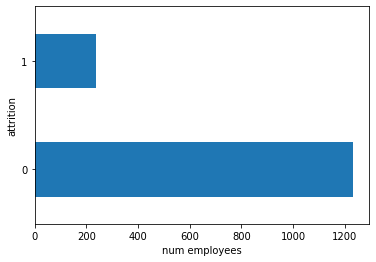

In [43]:
data = pd.read_csv("https://raw.githubusercontent.com/afnanrahman/EAFP/main/data/clean_data.csv").iloc[:, 1:31]

data['attrition'].value_counts().plot(kind='barh')
plt.xlabel('num employees')
plt.ylabel('attrition')

In [7]:
(data['attrition'].value_counts() / len(data))*100

0    83.877551
1    16.122449
Name: attrition, dtype: float64

From the code above, we can see that only 16% of all employees in this dataset have quit their job. This shows us that this dataset is imbalanced, and that we need to fix it for our future modeling.

In [8]:
data_cols = data.drop('attrition', axis = 1) #x
target_var = data['attrition'] #y

In [9]:
sm =  SMOTE()
data_cols_sm, target_var_sm = sm.fit_resample(data_cols, target_var)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [10]:
df = pd.DataFrame({'attrition': target_var_sm})
df.value_counts()

attrition
1            1233
0            1233
dtype: int64

We can now see that the dataset is completely balanced, with respect to our target variable, employee attrition. 

In [11]:
len(data_cols_sm)

2466

In [12]:
len(target_var_sm)

2466

In [13]:
target_var_sm = target_var_sm.reshape(-1, 1)
merged_smote = np.concatenate((data_cols_sm, target_var_sm), axis = 1)
np.savetxt('smote_data_new.csv', merged_smote, delimiter=',')

In [14]:
pd.read_csv("/content/smote_data_new.csv")

,4.100000000000000000e+01,2.000000000000000000e+00,1.102000000000000000e+03,2.000000000000000000e+00.1,1.000000000000000000e+00,2.000000000000000000e+00.2,1.000000000000000000e+00.1,1.000000000000000000e+00.2,2.000000000000000000e+00.3,0.000000000000000000e+00,9.400000000000000000e+01,3.000000000000000000e+00,2.000000000000000000e+00.4,7.000000000000000000e+00,4.000000000000000000e+00,2.000000000000000000e+00.5,1.947900000000000000e+04,8.000000000000000000e+00,1.000000000000000000e+00.3,1.100000000000000000e+01,3.000000000000000000e+00.1,1.000000000000000000e+00.4,0.000000000000000000e+00.1,8.000000000000000000e+00.1,0.000000000000000000e+00.2,1.000000000000000000e+00.5,6.000000000000000000e+00,4.000000000000000000e+00.1,5.000000000000000000e+00,1.000000000000000000e+00.6
0,49.0,1.0,279.0,1.0,8.0,1.0,1.0,2.0,3.0,1.0,61.0,2.0,2.0,6.0,2.0,1.0,24907.0,1.0,0.0,23.0,4.0,4.0,1.0,10.0,3.0,3.0,10.0,7.0,7.0,0.0
1,37.0,2.0,1373.0,1.0,2.0,2.0,4.0,4.0,4.0,1.0,92.0,2.0,1.0,2.0,3.0,2.0,2396.0,6.0,1.0,15.0,3.0,2.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,1.0
2,33.0,1.0,1392.0,1.0,3.0,4.0,1.0,5.0,4.0,0.0,56.0,3.0,1.0,6.0,3.0,1.0,23159.0,1.0,1.0,11.0,3.0,3.0,0.0,8.0,3.0,3.0,8.0,7.0,0.0,0.0
3,27.0,2.0,591.0,1.0,2.0,1.0,3.0,7.0,1.0,1.0,40.0,3.0,1.0,2.0,2.0,1.0,16632.0,9.0,0.0,12.0,3.0,4.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,0.0
4,32.0,1.0,1005.0,1.0,2.0,2.0,1.0,8.0,4.0,1.0,79.0,3.0,1.0,2.0,4.0,2.0,11864.0,0.0,0.0,13.0,3.0,3.0,0.0,8.0,2.0,2.0,7.0,7.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,29.0,1.0,706.0,1.0,1.0,2.0,1.0,1557.0,2.0,1.0,62.0,2.0,1.0,6.0,1.0,1.0,5325.0,1.0,0.0,11.0,3.0,3.0,0.0,9.0,3.0,2.0,9.0,7.0,6.0,1.0
2461,35.0,1.0,701.0,1.0,13.0,3.0,3.0,1081.0,1.0,0.0,78.0,3.0,1.0,2.0,2.0,0.0,7906.0,6.0,0.0,13.0,3.0,1.0,0.0,8.0,2.0,2.0,1.0,0.0,0.0,1.0
2462,28.0,1.0,984.0,2.0,13.0,3.0,2.0,1736.0,1.0,0.0,70.0,3.0,2.0,7.0,3.0,1.0,18899.0,1.0,0.0,12.0,3.0,1.0,2.0,8.0,2.0,3.0,0.0,0.0,0.0,1.0
2463,38.0,2.0,337.0,2.0,16.0,3.0,2.0,1181.0,2.0,1.0,62.0,3.0,2.0,7.0,2.0,2.0,9586.0,3.0,1.0,15.0,3.0,2.0,0.0,13.0,2.0,2.0,10.0,3.0,4.0,1.0


As seen above, we need to fix the header names.

In [16]:
col_names = pd.read_csv("https://raw.githubusercontent.com/afnanrahman/EAFP/main/data/clean_data.csv", index_col=0, nrows=0).columns.tolist()
col_names

['age',
 'attrition',
 'business_travel',
 'daily_rate',
 'department',
 'distance_from_home',
 'education',
 'education_field',
 'employee_number',
 'environment_satisfaction',
 'gender',
 'hourly_rate',
 'job_involvement',
 'job_level',
 'job_role',
 'job_satisfaction',
 'marital_status',
 'monthly_rate',
 'num_companies_worked',
 'over_time',
 'percent_salary_hike',
 'performance_rating',
 'relationship_satisfaction',
 'stock_option_level',
 'total_working_years',
 'training_times_last_year',
 'work_life_balance',
 'years_at_company',
 'years_in_current_role',
 'years_with_curr_manager',
 'rate_avg']

In [21]:
col_names.remove('attrition')
col_names.remove('rate_avg')
col_names.append('attrition') 

In [22]:
col_names

['age',
 'business_travel',
 'daily_rate',
 'department',
 'distance_from_home',
 'education',
 'education_field',
 'employee_number',
 'environment_satisfaction',
 'gender',
 'hourly_rate',
 'job_involvement',
 'job_level',
 'job_role',
 'job_satisfaction',
 'marital_status',
 'monthly_rate',
 'num_companies_worked',
 'over_time',
 'percent_salary_hike',
 'performance_rating',
 'relationship_satisfaction',
 'stock_option_level',
 'total_working_years',
 'training_times_last_year',
 'work_life_balance',
 'years_at_company',
 'years_in_current_role',
 'years_with_curr_manager',
 'attrition']

In [23]:
smote_data = pd.read_csv("/content/smote_data_new.csv", names = col_names)
smote_data

,age,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_with_curr_manager,attrition
0,41.0,2.0,1102.0,2.0,1.0,2.0,1.0,1.0,2.0,0.0,94.0,3.0,2.0,7.0,4.0,2.0,19479.0,8.0,1.0,11.0,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,5.0,1.0
1,49.0,1.0,279.0,1.0,8.0,1.0,1.0,2.0,3.0,1.0,61.0,2.0,2.0,6.0,2.0,1.0,24907.0,1.0,0.0,23.0,4.0,4.0,1.0,10.0,3.0,3.0,10.0,7.0,7.0,0.0
2,37.0,2.0,1373.0,1.0,2.0,2.0,4.0,4.0,4.0,1.0,92.0,2.0,1.0,2.0,3.0,2.0,2396.0,6.0,1.0,15.0,3.0,2.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,1.0
3,33.0,1.0,1392.0,1.0,3.0,4.0,1.0,5.0,4.0,0.0,56.0,3.0,1.0,6.0,3.0,1.0,23159.0,1.0,1.0,11.0,3.0,3.0,0.0,8.0,3.0,3.0,8.0,7.0,0.0,0.0
4,27.0,2.0,591.0,1.0,2.0,1.0,3.0,7.0,1.0,1.0,40.0,3.0,1.0,2.0,2.0,1.0,16632.0,9.0,0.0,12.0,3.0,4.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,29.0,1.0,706.0,1.0,1.0,2.0,1.0,1557.0,2.0,1.0,62.0,2.0,1.0,6.0,1.0,1.0,5325.0,1.0,0.0,11.0,3.0,3.0,0.0,9.0,3.0,2.0,9.0,7.0,6.0,1.0
2462,35.0,1.0,701.0,1.0,13.0,3.0,3.0,1081.0,1.0,0.0,78.0,3.0,1.0,2.0,2.0,0.0,7906.0,6.0,0.0,13.0,3.0,1.0,0.0,8.0,2.0,2.0,1.0,0.0,0.0,1.0
2463,28.0,1.0,984.0,2.0,13.0,3.0,2.0,1736.0,1.0,0.0,70.0,3.0,2.0,7.0,3.0,1.0,18899.0,1.0,0.0,12.0,3.0,1.0,2.0,8.0,2.0,3.0,0.0,0.0,0.0,1.0
2464,38.0,2.0,337.0,2.0,16.0,3.0,2.0,1181.0,2.0,1.0,62.0,3.0,2.0,7.0,2.0,2.0,9586.0,3.0,1.0,15.0,3.0,2.0,0.0,13.0,2.0,2.0,10.0,3.0,4.0,1.0


In [26]:
for col in smote_data.columns:
  smote_data[f'{col}'] = smote_data[f'{col}'].astype(int)

smote_data.loc[smote_data['attrition'] == 1, 'attrition'] = 'Yes'
smote_data.loc[smote_data['attrition'] == 0, 'attrition'] = 'No'

In [27]:
smote_data

,age,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_with_curr_manager,attrition
0,41,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,19479,8,1,11,3,1,0,8,0,1,6,4,5,Yes
1,49,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,24907,1,0,23,4,4,1,10,3,3,10,7,7,No
2,37,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2396,6,1,15,3,2,0,7,3,3,0,0,0,Yes
3,33,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,23159,1,1,11,3,3,0,8,3,3,8,7,0,No
4,27,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,16632,9,0,12,3,4,1,6,3,3,2,2,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,29,1,706,1,1,2,1,1557,2,1,62,2,1,6,1,1,5325,1,0,11,3,3,0,9,3,2,9,7,6,Yes
2462,35,1,701,1,13,3,3,1081,1,0,78,3,1,2,2,0,7906,6,0,13,3,1,0,8,2,2,1,0,0,Yes
2463,28,1,984,2,13,3,2,1736,1,0,70,3,2,7,3,1,18899,1,0,12,3,1,2,8,2,3,0,0,0,Yes
2464,38,2,337,2,16,3,2,1181,2,1,62,3,2,7,2,2,9586,3,1,15,3,2,0,13,2,2,10,3,4,Yes


In [28]:
smote_data['attrition'].value_counts()

No     1233
Yes    1233
Name: attrition, dtype: int64

If you recall at the beginning of this notebook, I chose to remove the `rate_avg` column. But as it is something which can be calculated, I can just simply calculate it now, after the SMOTE balancing has been applied to the dataset and all values have been properly 'mimiced'/'expanded upon'.

In [39]:
smote_data['rate_avg'] = smote_data[['hourly_rate', 'daily_rate', 'monthly_rate']].mean(axis=1).round(2)

In [40]:
smote_data

,age,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_with_curr_manager,attrition,rate_avg
0,41,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,19479,8,1,11,3,1,0,8,0,1,6,4,5,Yes,6891.67
1,49,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,24907,1,0,23,4,4,1,10,3,3,10,7,7,No,8415.67
2,37,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2396,6,1,15,3,2,0,7,3,3,0,0,0,Yes,1287.00
3,33,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,23159,1,1,11,3,3,0,8,3,3,8,7,0,No,8202.33
4,27,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,16632,9,0,12,3,4,1,6,3,3,2,2,2,No,5754.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,29,1,706,1,1,2,1,1557,2,1,62,2,1,6,1,1,5325,1,0,11,3,3,0,9,3,2,9,7,6,Yes,2031.00
2462,35,1,701,1,13,3,3,1081,1,0,78,3,1,2,2,0,7906,6,0,13,3,1,0,8,2,2,1,0,0,Yes,2895.00
2463,28,1,984,2,13,3,2,1736,1,0,70,3,2,7,3,1,18899,1,0,12,3,1,2,8,2,3,0,0,0,Yes,6651.00
2464,38,2,337,2,16,3,2,1181,2,1,62,3,2,7,2,2,9586,3,1,15,3,2,0,13,2,2,10,3,4,Yes,3328.33


In [44]:
smote_data.to_csv('clean_smote_data.csv', index=False)